In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error
#per fer grafic de la regressio
def plot_parity(y_true, y_pred, y_pred_unc=None):
    
    axmin = min(min(y_true), min(y_pred)) - 0.1*(max(y_true)-min(y_true))
    axmax = max(max(y_true), max(y_pred)) + 0.1*(max(y_true)-min(y_true))
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    
    plt.plot([axmin, axmax], [axmin, axmax], '--k')

    plt.errorbar(y_true, y_pred, yerr=y_pred_unc, linewidth=0, marker='o', markeredgecolor='w', alpha=1, elinewidth=1)
    
    plt.xlim((axmin, axmax))
    plt.ylim((axmin, axmax))
    
    ax = plt.gca()
    ax.set_aspect('equal')
    
    at = AnchoredText(
    f"MAE = {mae:.2f}\nRMSE = {rmse:.2f}", prop=dict(size=10), frameon=True, loc='upper left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    
    plt.xlabel('True')
    plt.ylabel('Chemprop Predicted')
    plt.title('Regression')

    plt.show()
    
    return

In [2]:
#aqui ens baixem les dades de les molecules amb el pIC50 real
df_true = pd.read_csv('test_checkpoints_reg2/fold_0/test_full.csv')
print(df_true.columns)

Index(['SMILES', 'pIC50'], dtype='object')


In [3]:
#aqui ens baixem les dades de les molecules amb el pIC50 que ens ha predit el model creat
df_preds = pd.read_csv('test_preds_reg2.csv')
print(df_preds.columns)

#com que tenen el mateix nom canviem el nom de la columna pIC50 en aquest data frame per preds
#aixi identificarem millor les prediccions

df_preds.rename(columns={'pIC50': 'preds'}, inplace=True)
print(df_preds.columns)

Index(['SMILES', 'pIC50'], dtype='object')
Index(['SMILES', 'preds'], dtype='object')


In [4]:
df = df_true.merge(df_preds, on='SMILES', how='inner')

# 'how' determina cómo se realiza la unión, en este caso, 'inner' toma solo las moléculas comunes

print(df)

                                                SMILES     pIC50     preds
0    Cc1c(O)cccc1C(=O)N[C@@H](Cc1ccccc1)[C@H](O)C(=... -2.000000 -2.373741
1    CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.259637  6.894934
2    CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  7.259637  6.897018
3    CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  6.259637  6.289916
4    CC(C)C1NC(=O)[C@H](NCc2ccc(OCCOCCOCCNC1=O)cc2)... -2.000000 -2.074384
..                                                 ...       ...       ...
130  CC(C)(C)NC(=O)[C@@H]1C[C@@H]2CCCC[C@@H]2CN1C[C... -2.000000 -1.839972
131  OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@... -2.000000 -2.150431
132  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...  5.259637  6.808461
133  CC(C)C[C@H]1[C@H](CCS1(=O)=O)OC(=O)N[C@@H](Cc1... -2.000000 -1.950508
134  CC(C)[C@@H]1[C@@H](CCS1(=O)=O)OC(=O)N[C@@H](Cc... -2.000000 -1.917956

[135 rows x 3 columns]


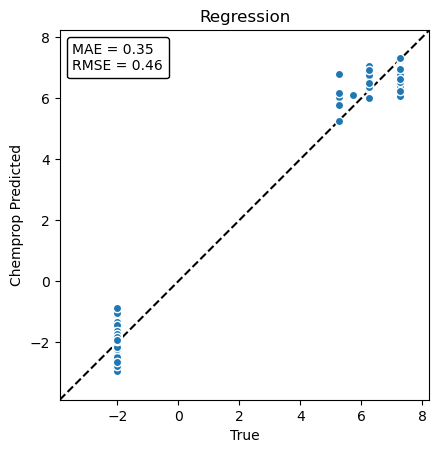

In [7]:
plot_parity(df.pIC50, df.preds)